
# 第二章 数据科学的编程工具
Python使用简介


王成军

![](./images/author.png)

## 人生苦短，我用Python。

Python（/ˈpaɪθən/）是一种面向对象、解释型计算机程序设计语言
- 由Guido van Rossum于1989年底发明
- 第一个公开发行版发行于1991年
- Python语法简洁而清晰
- 具有强大的标准库和丰富的第三方模块
- 它常被昵称为胶水语言
- TIOBE编程语言排行榜“2010年度编程语言”



## 特点
- 免费、功能强大、使用者众多
- 与R和MATLAB相比，Python是一门更易学、更严谨的程序设计语言。使用Python编写的脚本更易于理解和维护。
- 如同其它编程语言一样，Python语言的基础知识包括：类型、列表（list）和元组（tuple）、字典（dictionary）、条件、循环、异常处理等。
- 关于这些，初阶读者可以阅读《Beginning Python》一书（Hetland, 2005)。


## Python中包含了丰富的类库。
众多开源的科学计算软件包都提供了Python的调用接口，例如著名的计算机视觉库OpenCV。
Python本身的科学计算类库发展也十分完善，例如NumPy、SciPy和matplotlib等。
就社会网络分析而言，igraph, networkx, graph-tool, Snap.py等类库提供了丰富的网络分析工具

## Python软件与IDE
目前最新的Python版本为3.0，更稳定的2.7版本。
编译器是编写程序的重要工具。
免费的Python编译器有Spyder、PyCharm(免费社区版)、Ipython、Vim、 Emacs、 Eclipse(加上PyDev插件)。


## Installing Anaconda Python
- Use the Anaconda Python
    - http://anaconda.com/

## 第三方包可以使用pip install的方法安装。
- 可以点击ToolsOpen command prompt
- 然后在打开的命令窗口中输入：
    - <del>pip install beautifulsoup4 


> pip install beautifulsoup4

- NumPy /SciPy for scientific computing
- pandas to make Python usable for data analysis
- matplotlib to make graphics
- scikit-learn for machine learning


In [1]:
pip install flownetwork

Note: you may need to restart the kernel to use updated packages.


In [2]:
from flownetwork import flownetwork as fn
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

print(fn.__version__)


$version = py3.0.1$


In [3]:
help(fn.constructFlowNetwork)

Help on function constructFlowNetwork in module flownetwork.flownetwork:

constructFlowNetwork(C)
    C is an array of two dimentions, e.g., 
    C = np.array([[user1, item1], 
                  [user1, item2], 
                  [user2, item1], 
                  [user2, item3]])
    Return a balanced flow network



In [4]:
# constructing a flow network
demo = fn.attention_data
gd = fn.constructFlowNetwork(demo)

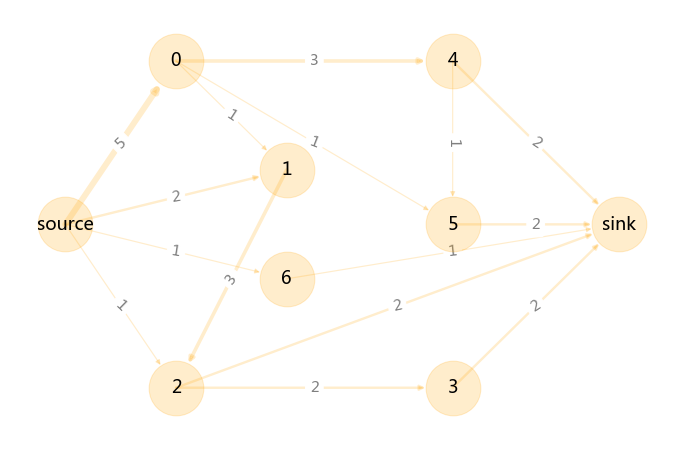

In [5]:
# drawing a demo network
fig = plt.figure(figsize=(12, 8),facecolor='white')
pos={0: np.array([ 0.2 ,  0.8]),
 2: np.array([ 0.2,  0.2]),
 1: np.array([ 0.4,  0.6]),
 6: np.array([ 0.4,  0.4]),
 4: np.array([ 0.7,  0.8]),
 5: np.array([ 0.7,  0.5]),
 3: np.array([ 0.7,  0.2 ]),
 'sink': np.array([ 1,  0.5]),
 'source': np.array([ 0,  0.5])}

width=[float(d['weight']*1.2) for (u,v,d) in gd.edges(data=True)]
edge_labels=dict([((u,v,),d['weight']) for u,v,d in gd.edges(data=True)])

nx.draw_networkx_edge_labels(gd,pos,edge_labels=edge_labels, font_size = 15, alpha = .5)
nx.draw(gd, pos, node_size = 3000, node_color = 'orange',
        alpha = 0.2, width = width, edge_color='orange',style='solid')
nx.draw_networkx_labels(gd,pos,font_size=18)
plt.show()

In [6]:
nx.info(gd)

'Name: \nType: DiGraph\nNumber of nodes: 9\nNumber of edges: 15\nAverage in degree:   1.6667\nAverage out degree:   1.6667'

In [7]:
# flow matrix
m = fn.getFlowMatrix(gd)
m

matrix([[0., 5., 1., 0., 2., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 3., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 3., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 2., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 0., 0., 1.],
        [0., 0., 0., 2., 0., 0., 0., 0., 0.]])

In [8]:
fn.networkDissipate(gd)


defaultdict(<function flownetwork.flownetwork.networkDissipate.<locals>.<lambda>()>,
            {0: [0, 5, 5],
             1: [0, 3, 2],
             2: [2, 4, 1],
             6: [1, 1, 1],
             3: [2, 2, 0],
             4: [2, 3, 0],
             5: [2, 2, 0]})

In [9]:
import random, datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats.stats import pearsonr

In [11]:
with open('./data/the_republic_plato_gutenberg_pg1497.txt', 'r') as f:
    lines = f.readlines()

In [12]:
len(lines)

24692

In [13]:
type(lines)

list

In [24]:
lines[8520:8530]

['\n',
 '\n',
 '\n',
 '\n',
 'BOOK I.\n',
 '\n',
 'I went down yesterday to the Piraeus with Glaucon the son of Ariston,\n',
 'that I might offer up my prayers to the goddess (Bendis, the Thracian\n',
 'Artemis.); and also because I wanted to see in what manner they would\n',
 'celebrate the festival, which was a new thing. I was delighted with the\n']

## Variable Type


In [27]:
# str, int, float, bool
str(3)

'3'

In [28]:
"chengjun wang"

'chengjun wang'

In [29]:
# int
int('5') 

5

In [31]:
# float
float(str(7.1))

7.1

In [32]:
range(10)

range(0, 10)

In [33]:
# for i in range(1, 10):
#     print(i)

range(1,10) 

range(1, 10)

## dir & help

当你想要了解对象的详细信息时使用

In [26]:
dir(str) 

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [36]:
'cheng'.capitalize()

'Cheng'

In [7]:
dir(str)[-10:]

['rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [63]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

In [45]:
'   '.isspace()

True

In [35]:
'socrates the king'.__add__(' is the greatest.')

'socrates the king is the greatest.'

In [46]:
x = ' Hello WorlD  '
dir(x)[-10:] 

['rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [47]:
# lower
x.lower() 

' hello world  '

In [49]:
# upper
x.upper()

' HELLO WORLD  '

In [50]:
# rstrip
x.lstrip()

'Hello WorlD  '

In [48]:
# strip
x.strip()

'Hello WorlD'

In [51]:
# replace
x.replace('lo', '')

' Hel WorlD  '

In [52]:
# split
x.split('lo')

[' Hel', ' WorlD  ']

In [53]:
# join 
','.join(['a', 'b'])

'a,b'

## type
当你想要了解变量类型时使用type

In [59]:
x = 'hello world'
type(x)

str

## Data Structure
list, tuple, set, dictionary, array


In [54]:
l = [1,2,3,3] # list
t = (1, 2, 3, 3) # tuple
s = {1, 2, 3, 3} # set([1,2,3,3]) # set
d = {'a':1,'b':2,'c':3} # dict
a = np.array(l) # array
print(l, t, s, d, a)


[1, 2, 3, 3] (1, 2, 3, 3) {1, 2, 3} {'a': 1, 'b': 2, 'c': 3} [1 2 3 3]


In [60]:
l = [1,2,3,3] # list
l.append(4)
l

[1, 2, 3, 3, 4]

In [57]:
d = {'a':1,'b':2,'c':3} # dict
d.keys()

dict_keys(['a', 'b', 'c'])

In [58]:
d = {'a':1,'b':2,'c':3} # dict
d.values()

dict_values([1, 2, 3])

In [59]:
d = {'a':1,'b':2,'c':3} # dict
d['b']

2

In [64]:
d = {'a':1,'b':2,'c':3} # dict
d.items() 

dict_items([('a', 1), ('b', 2), ('c', 3)])

## 定义函数

In [64]:
def devidePlus(m, n): # 结尾是冒号
    y = m/n + 1 # 注意：空格
    return y          # 注意：return

## For 循环

In [65]:
range(10)

range(0, 10)

In [66]:
range(1, 10)  

range(1, 10)

In [67]:
for i in range(10):
    print(i, i*10, i**2)

0 0 0
1 10 1
2 20 4
3 30 9
4 40 16
5 50 25
6 60 36
7 70 49
8 80 64
9 90 81


In [68]:
for i in range(10):
    print(i*10) 

0
10
20
30
40
50
60
70
80
90


In [73]:
for i in range(10):
    print(devidePlus(i, 2))

1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5


In [71]:
# 列表内部的for循环
r = [devidePlus(i, 2) for i in range(10)]
r 

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]

## map函数

In [74]:
def fahrenheit(T):
    return ((float(9)/5)*T + 32)

temp = [0, 22.5, 40,100]
F_temps = map(fahrenheit, temp)

print(*F_temps)

32.0 72.5 104.0 212.0


In [13]:
m1 = map(devidePlus, [4,3,2], [2, 1, 5])
print(*m1)
#print(*map(devidePlus, [4,3,2], [2, 1, 5]))
# 注意： 将（4， 2)作为一个组合进行计算，将（3， 1）作为一个组合进行计算

3.0 4.0 1.4


In [75]:
m2 = map(lambda x, y: x + y, [1, 3, 5, 7, 9], [2, 4, 6, 8, 10])
print(*m2)

3 7 11 15 19


In [78]:
m3 = map(lambda x, y, z: x + y - z, [1, 3, 5, 7, 9], [2, 4, 6, 8, 10], [3, 3, 2, 2, 5])
print(*m3)

0 4 9 13 14


## if elif else

In [37]:
j = 5
if j%2 == 1:
    print(r'余数是1')
elif j%2 ==0:
    print(r'余数是0')
else:
    print(r'余数既不是1也不是0')

余数是1


In [16]:
x = 5
if x < 5:
    y = -1
    z = 5
elif x > 5:
    y = 1
    z = 11
else:
    y = 0
    z = 10
print(x, y, z)

5 0 10


## while循环

In [17]:
j = 0
while j <10:
    print(j)
    j+=1 # avoid dead loop
    

0
1
2
3
4
5
6
7
8
9


In [40]:
j = 0
while j <10:
    if j%2 != 0: 
        print(j**2)
    j+=1 # avoid dead loop 

1
9
25
49
81


In [41]:
j = 0
while j <50:
    if j == 30:
        break
    if j%2 != 0: 
        print(j**2)
    j+=1 # avoid dead loop
    

1
9
25
49
81
121
169
225
289
361
441
529
625
729
841


In [77]:
a = 4
while a: # 0, None, False
    print(a) 
    a -= 1
    if a < 0:
        a = None # []

4
3
2
1


## try except 

In [80]:
def devidePlus(m, n): # 结尾是冒号
    return m/n+ 1 # 注意：空格


for i in [2, 0, 5]:
    try:
        print(devidePlus(4, i))
    except Exception as e:
        print(i, e)
        pass

3.0
0 division by zero
1.8


In [47]:
alist = [[1,1], [0, 0, 1]]
for aa in alist:
    try:
        for a in aa:
            print(10 / a)
    except Exception as e:
        print(e)
        pass

10.0
10.0
division by zero


In [46]:
alist = [[1,1], [0, 0, 1]]
for aa in alist:
    for a in aa:
        try:
            print(10 / a)
        except Exception as e:
            print(e)
            pass

10.0
10.0
division by zero
division by zero
10.0


## Write and Read data

In [82]:
data =[[i, i**2, i**3] for i in range(10)] 
data

[[0, 0, 0],
 [1, 1, 1],
 [2, 4, 8],
 [3, 9, 27],
 [4, 16, 64],
 [5, 25, 125],
 [6, 36, 216],
 [7, 49, 343],
 [8, 64, 512],
 [9, 81, 729]]

In [83]:
for i in data:
    print('\t'.join(map(str, i)))  

0	0	0
1	1	1
2	4	8
3	9	27
4	16	64
5	25	125
6	36	216
7	49	343
8	64	512
9	81	729


In [84]:
type(data)

list

In [85]:
len(data)

10

In [86]:
data[0]

[0, 0, 0]

In [87]:
help(f.write)  

Help on built-in function write:

write(text, /) method of _io.TextIOWrapper instance
    Write string to stream.
    Returns the number of characters written (which is always equal to
    the length of the string).



In [88]:
# 保存数据
data =[[i, i**2, i**3] for i in range(10000)] 

f = open("data_write_to_file1.txt", "w")
for i in data:
    f.write('\t'.join(map(str,i)) + '\n')
f.close()


In [89]:
with open('data_write_to_file1.txt','r') as f:
    data = f.readlines()
data[:5]

['0\t0\t0\n', '1\t1\t1\n', '2\t4\t8\n', '3\t9\t27\n', '4\t16\t64\n']

In [91]:
with open('data_write_to_file1.txt','r') as f:
    data = f.readlines(1000) #bytes 
len(data) 

77

In [93]:
with open('data_write_to_file1.txt','r') as f:
    print(f.readline())

0	0	0



In [94]:
f = [1, 2, 3, 4, 5]
for k, i in enumerate(f):
    print(k, i)

# with open('data_write_to_file1.txt', 'r') as f:
#      for i in f:
#             print(i)

0 1
1 2
2 3
3 4
4 5


In [101]:
total = 0
with open('data_write_to_file1.txt','r') as f:
    for k, i in enumerate(f):
        if k % 1000 ==0:
            print(k)
        total += sum([int(j) for j in i.strip().split('\t')])

print(total)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
2499833358330000


In [32]:
with open('../data/data_write_to_file.txt','r') as f:
    for k, i in enumerate(f):
        if k%2000 == 0:
            print(i)

0	0	0

2000	4000000	8000000000

4000	16000000	64000000000

6000	36000000	216000000000

8000	64000000	512000000000



In [33]:
data = []
line = '0\t0\t0\n'
line = line.replace('\n', '')
line = line.split('\t')
line = [int(i) for i in line] # convert str to int
data.append(line) 
data

[[0, 0, 0]]

In [102]:
# 读取数据
data = []
with open('data_write_to_file1.txt','r') as f:
    for line in f:
        line = line.replace('\n', '').split('\t')
        line = [int(i) for i in line]
        data.append(line)
data

[[0, 0, 0],
 [1, 1, 1],
 [2, 4, 8],
 [3, 9, 27],
 [4, 16, 64],
 [5, 25, 125],
 [6, 36, 216],
 [7, 49, 343],
 [8, 64, 512],
 [9, 81, 729],
 [10, 100, 1000],
 [11, 121, 1331],
 [12, 144, 1728],
 [13, 169, 2197],
 [14, 196, 2744],
 [15, 225, 3375],
 [16, 256, 4096],
 [17, 289, 4913],
 [18, 324, 5832],
 [19, 361, 6859],
 [20, 400, 8000],
 [21, 441, 9261],
 [22, 484, 10648],
 [23, 529, 12167],
 [24, 576, 13824],
 [25, 625, 15625],
 [26, 676, 17576],
 [27, 729, 19683],
 [28, 784, 21952],
 [29, 841, 24389],
 [30, 900, 27000],
 [31, 961, 29791],
 [32, 1024, 32768],
 [33, 1089, 35937],
 [34, 1156, 39304],
 [35, 1225, 42875],
 [36, 1296, 46656],
 [37, 1369, 50653],
 [38, 1444, 54872],
 [39, 1521, 59319],
 [40, 1600, 64000],
 [41, 1681, 68921],
 [42, 1764, 74088],
 [43, 1849, 79507],
 [44, 1936, 85184],
 [45, 2025, 91125],
 [46, 2116, 97336],
 [47, 2209, 103823],
 [48, 2304, 110592],
 [49, 2401, 117649],
 [50, 2500, 125000],
 [51, 2601, 132651],
 [52, 2704, 140608],
 [53, 2809, 148877],
 [54, 291

In [60]:
# 读取数据
data = []
with open('../data/data_write_to_file.txt','r') as f:
    for line in f:
        line = line.replace('\n', '').split('\t')
        line = [int(i) for i in line]
        data.append(line)
data


[[0, 0, 0],
 [1, 1, 1],
 [2, 4, 8],
 [3, 9, 27],
 [4, 16, 64],
 [5, 25, 125],
 [6, 36, 216],
 [7, 49, 343],
 [8, 64, 512],
 [9, 81, 729],
 [10, 100, 1000],
 [11, 121, 1331],
 [12, 144, 1728],
 [13, 169, 2197],
 [14, 196, 2744],
 [15, 225, 3375],
 [16, 256, 4096],
 [17, 289, 4913],
 [18, 324, 5832],
 [19, 361, 6859],
 [20, 400, 8000],
 [21, 441, 9261],
 [22, 484, 10648],
 [23, 529, 12167],
 [24, 576, 13824],
 [25, 625, 15625],
 [26, 676, 17576],
 [27, 729, 19683],
 [28, 784, 21952],
 [29, 841, 24389],
 [30, 900, 27000],
 [31, 961, 29791],
 [32, 1024, 32768],
 [33, 1089, 35937],
 [34, 1156, 39304],
 [35, 1225, 42875],
 [36, 1296, 46656],
 [37, 1369, 50653],
 [38, 1444, 54872],
 [39, 1521, 59319],
 [40, 1600, 64000],
 [41, 1681, 68921],
 [42, 1764, 74088],
 [43, 1849, 79507],
 [44, 1936, 85184],
 [45, 2025, 91125],
 [46, 2116, 97336],
 [47, 2209, 103823],
 [48, 2304, 110592],
 [49, 2401, 117649],
 [50, 2500, 125000],
 [51, 2601, 132651],
 [52, 2704, 140608],
 [53, 2809, 148877],
 [54, 291

In [103]:
import pandas as pd

In [4]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=

In [105]:
df = pd.read_csv('data_write_to_file1.txt', 
                 sep = '\t', names = ['a', 'b', 'c'])
df[:5]

a   b   c
0  0   0   0
1  1   1   1
2  2   4   8
3  3   9  27
4  4  16  64

## 保存中间步骤产生的字典数据

In [109]:
import json
data_dict = {'a':1, 'b':2, 'c':3}
with open('./data/save_dict.json', 'w') as f:
    json.dump(data_dict, f)

In [111]:
dd = json.load(open("./data/save_dict.json"))
dd

{'a': 1, 'b': 2, 'c': 3}

## 重新读入json

## 保存中间步骤产生的列表数据

In [71]:
data_list = list(range(10))
with open('../data/save_list.json', 'w') as f:
    json.dump(data_list, f)

In [72]:
dl = json.load(open("../data/save_list.json"))
dl

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## 使用matplotlib绘图

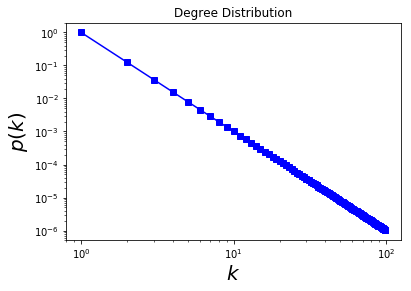

In [41]:
#
%matplotlib inline
import matplotlib.pyplot as plt
x = range(1, 100)
y = [i**-3 for i in x]
plt.plot(x, y, 'b-s')
plt.ylabel('$p(k)$', fontsize = 20)
plt.xlabel('$k$', fontsize = 20)
plt.xscale('log')
plt.yscale('log')
plt.title('Degree Distribution')
plt.show()

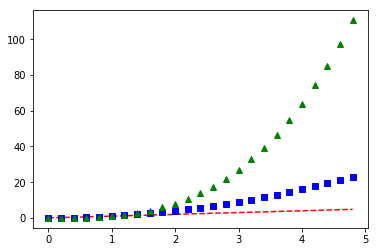

In [42]:
import numpy as np
# red dashes, blue squares and green triangles
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

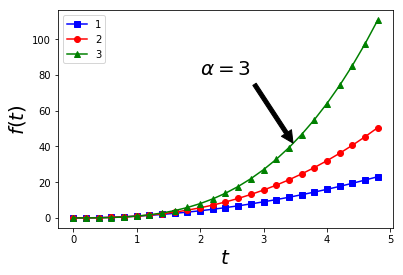

In [43]:
# red dashes, blue squares and green triangles
t = np.arange(0., 5., 0.2)
plt.plot(t, t**2, 'b-s', label = '1')
plt.plot(t, t**2.5, 'r-o', label = '2')
plt.plot(t, t**3, 'g-^', label = '3')
plt.annotate(r'$\alpha = 3$', xy=(3.5, 40), xytext=(2, 80),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize = 20)
plt.ylabel('$f(t)$', fontsize = 20)
plt.xlabel('$t$', fontsize = 20)
plt.legend(loc=2,numpoints=1,fontsize=10)
plt.show()
# plt.savefig('/Users/chengjun/GitHub/cjc/figure/save_figure.png',
#             dpi = 300, bbox_inches="tight",transparent = True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.set(style="whitegrid")

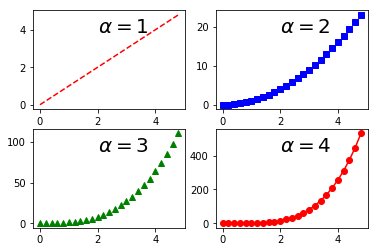

In [44]:
plt.figure(1)
plt.subplot(221)
plt.plot(t, t, 'r--')
plt.text(2, 0.8*np.max(t), r'$\alpha = 1$', fontsize = 20)
plt.subplot(222)
plt.plot(t, t**2, 'bs')
plt.text(2, 0.8*np.max(t**2), r'$\alpha = 2$', fontsize = 20)
plt.subplot(223)
plt.plot(t, t**3, 'g^')
plt.text(2, 0.8*np.max(t**3), r'$\alpha = 3$', fontsize = 20)
plt.subplot(224)
plt.plot(t, t**4, 'r-o')
plt.text(2, 0.8*np.max(t**4), r'$\alpha = 4$', fontsize = 20)
plt.show()

In [4]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

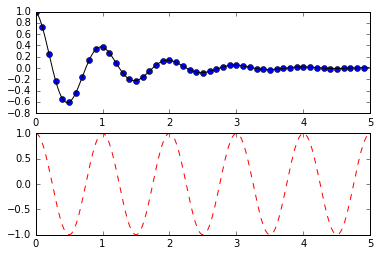

In [5]:
plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo')
plt.plot(t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

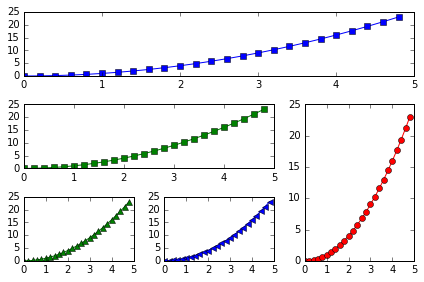

In [4]:
import matplotlib.gridspec as gridspec
import numpy as np

t = np.arange(0., 5., 0.2)

gs = gridspec.GridSpec(3, 3)
ax1 = plt.subplot(gs[0, :])
plt.plot(t, t**2, 'b-s')
ax2 = plt.subplot(gs[1,:-1])
plt.plot(t, t**2, 'g-s')
ax3 = plt.subplot(gs[1:, -1])
plt.plot(t, t**2, 'r-o')
ax4 = plt.subplot(gs[-1,0])
plt.plot(t, t**2, 'g-^')
ax5 = plt.subplot(gs[-1,1])
plt.plot(t, t**2, 'b-<')
plt.tight_layout()

In [45]:

def OLSRegressPlot(x,y,col,xlab,ylab):
    xx = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,xx).fit()
    constant, beta = res.params
    r2 = res.rsquared
    lab = r'$\beta = %.2f, \,R^2 = %.2f$' %(beta,r2)
    plt.scatter(x,y,s=60,facecolors='none', edgecolors=col)
    plt.plot(x,constant + x*beta,"red",label=lab)
    plt.legend(loc = 'upper left',fontsize=16)
    plt.xlabel(xlab,fontsize=26)
    plt.ylabel(ylab,fontsize=26)

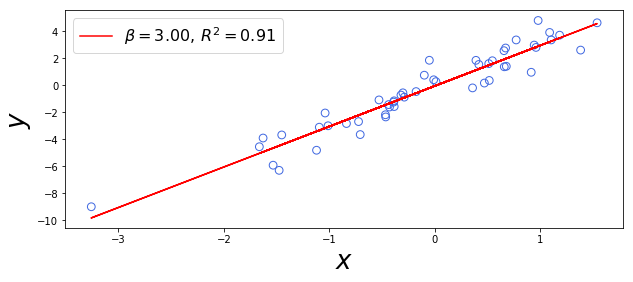

In [46]:
x = np.random.randn(50)
y = np.random.randn(50) + 3*x
pearsonr(x, y)
fig = plt.figure(figsize=(10, 4),facecolor='white')
OLSRegressPlot(x,y,'RoyalBlue',r'$x$',r'$y$')
plt.show()


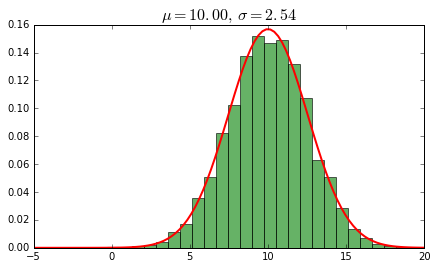

In [206]:
fig = plt.figure(figsize=(7, 4),facecolor='white')
data = norm.rvs(10.0, 2.5, size=5000)
mu, std = norm.fit(data)
plt.hist(data, bins=25, normed=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
title = r"$\mu = %.2f, \,  \sigma = %.2f$" % (mu, std)
plt.title(title,size=16)
plt.show()

In [47]:
import pandas as pd
df = pd.read_csv('../data/data_write_to_file.txt', sep = '\t', names = ['a', 'b', 'c'])
df[:5]

a   b   c
0  0   0   0
1  1   1   1
2  2   4   8
3  3   9  27
4  4  16  64

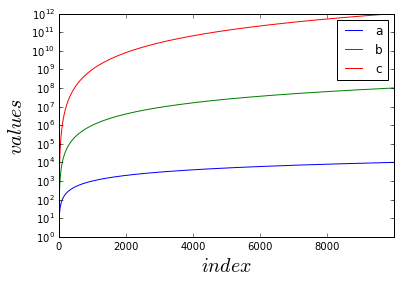

In [7]:
df.plot.line()
plt.yscale('log')
plt.ylabel('$values$', fontsize = 20)
plt.xlabel('$index$', fontsize = 20)
plt.show()

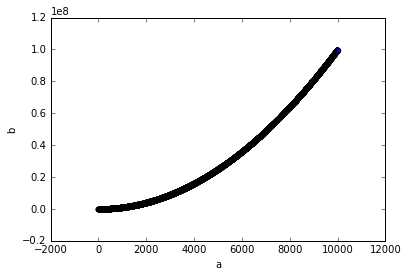

In [27]:
df.plot.scatter(x='a', y='b')
plt.show()

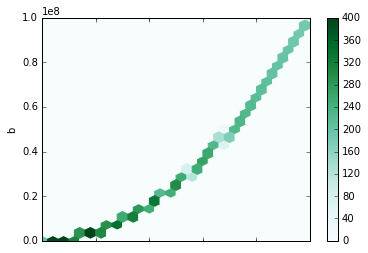

In [18]:
df.plot.hexbin(x='a', y='b', gridsize=25)
plt.show()

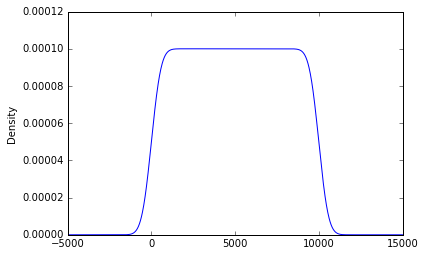

In [22]:
df['a'].plot.kde()
plt.show()

/Users/chengjun/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


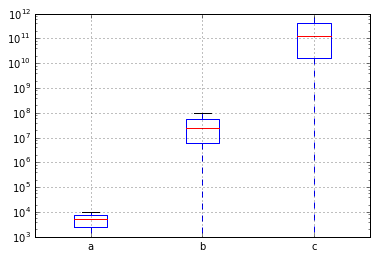

In [32]:
bp = df.boxplot()
plt.yscale('log')
plt.show()

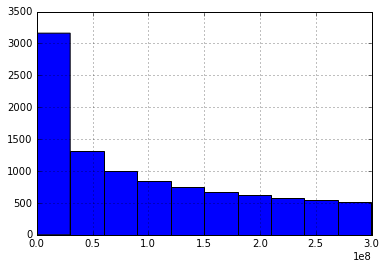

In [41]:
df['c'].diff().hist()
plt.show()

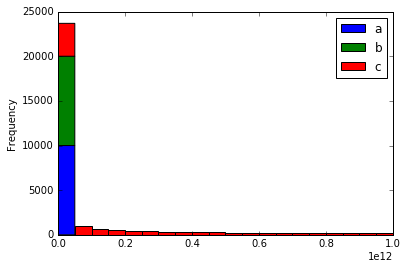

In [45]:
df.plot.hist(stacked=True, bins=20)
# plt.yscale('log')
plt.show()

> To be a programmer is to develop a carefully managed relationship with error. There's no getting around it. You either make your accommodations with failure, or the work will become intolerable.

Ellen Ullman  （an American computer programmer and author）


## This is the end.
> Thank you for your attention.